# Problem 2: Determine the Phase Transformation Pressure

NOTICE TO BINDER USERS: YOUR NOTEBOOK PROGRESS WILL NOT BE SAVED IF YOU CLOSE THIS WINDOW OR LEAVE IT INACTIVE FOR TOO LONG.

PLEASE DOWNLOAD YOUR NOTEBOOKS AND FILES REGULARLY OR DOWNLOAD THIS REPO AND RUN OFFLINE ON YOUR MACHINE. See "running_offline.md" for more info

## Applying strains to structures with pymatgen

For this walkthrough, I'll start with the relaxed structures for our two phases from the Materials Project (found in the directory "mp_structures") but you should use the structures that were output by your VASP calculations in Problem 1.

In [2]:
from pymatgen import Structure
from pymatgen.io.vasp import Poscar
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

# Si_DC = Structure.from_file("YOUR OPTIMIZATION CALC DIRECTORY")
Si_DC = Structure.from_file("convergence_tests/DC/E_350_K_8/CONTCAR")
Si_BSn = Structure.from_file("convergence_tests/BSn/E_350_K_8/CONTCAR")

Now, we'll need to create some VASP input files for our E vs V calculations. The first step is to have some way of applying uniform strains to structures. Luckily, pymatgen can do this for us too with it's `Deformation` class. Let's create a `Deformation` that applies a uniform strain of 10% to a structure. 

In [3]:
from pymatgen.io.vasp.inputs import Kpoints, Poscar, Potcar, Incar
from pymatgen.analysis.elasticity.strain import Deformation
from pymatgen.io.vasp.outputs import Outcar

# fill in this tuple with desired grid dimensions (e.g. (a, b, c))
grid = (8,8,8)

# We're using the gamma_automatic constructor here to create a grid centered at Gamma.
KPOINTS = Kpoints.monkhorst_automatic(kpts=grid)

print(KPOINTS)

Automatic kpoint scheme
0
Monkhorst
8 8 8



In [4]:
my_incar_params = {"EDIFF" : 0.0004, 
                "EDIFFG" : -0.01, 
                "ENCUT" : 350,
                "IBRION": 2, 
                "ISIF" : 2, 
                "ISMEAR" : 0, 
                "SIGMA" : 0.2 , 
                "NSW" : 15,
                "NBANDS" : 8,
                "LREAL" : 'False'}

In [5]:
INCAR = Incar.from_dict(my_incar_params)
print(INCAR)

EDIFF = 0.0004
EDIFFG = -0.01
ENCUT = 350
IBRION = 2
ISIF = 2
ISMEAR = 0
LREAL = False
NBANDS = 8
NSW = 15
SIGMA = 0.2



In [6]:
def write_input_set(POTCAR, POSCAR, INCAR, KPOINTS, directory="new_input_set", use_fake_potcar=True):
    
    import os
    if not os.path.exists(directory):
        os.makedirs(directory)

    if not use_fake_potcar:
        POTCAR.write_file("{}/POTCAR".format(directory))
    else:
        from shutil import copyfile
        # Copy over a fake potcar
        copyfile("fake_vasp_data/3kvi0H85jC/POTCAR", "directory")
    
    POSCAR.write_file("{}/POSCAR".format(directory))
    INCAR.write_file("{}/INCAR".format(directory))
    KPOINTS.write_file("{}/KPOINTS".format(directory))
    print("Input set written to '{}'".format(directory))

In [7]:
#Define the tensor list
num = []
for i in range(21):
    num.append(0.9+i*0.01)
for n in num:  
    dirname = "energy_cal/DC/defor_{}".format(n)
    deformation = Deformation(((n,0,0),(0,n,0),(0,0,n)))
    deformed_Si_DC = deformation.apply_to_structure(Si_DC)
    POSCAR = Poscar(deformed_Si_DC)
    write_input_set(None, POSCAR, INCAR, KPOINTS, directory=dirname)

Input set written to 'energy_cal/DC/defor_0.9'
Input set written to 'energy_cal/DC/defor_0.91'
Input set written to 'energy_cal/DC/defor_0.92'
Input set written to 'energy_cal/DC/defor_0.93'
Input set written to 'energy_cal/DC/defor_0.9400000000000001'
Input set written to 'energy_cal/DC/defor_0.9500000000000001'
Input set written to 'energy_cal/DC/defor_0.96'
Input set written to 'energy_cal/DC/defor_0.97'
Input set written to 'energy_cal/DC/defor_0.98'
Input set written to 'energy_cal/DC/defor_0.99'
Input set written to 'energy_cal/DC/defor_1.0'
Input set written to 'energy_cal/DC/defor_1.01'
Input set written to 'energy_cal/DC/defor_1.02'
Input set written to 'energy_cal/DC/defor_1.03'
Input set written to 'energy_cal/DC/defor_1.04'
Input set written to 'energy_cal/DC/defor_1.05'
Input set written to 'energy_cal/DC/defor_1.06'
Input set written to 'energy_cal/DC/defor_1.07'
Input set written to 'energy_cal/DC/defor_1.08'
Input set written to 'energy_cal/DC/defor_1.09'
Input set writ

In [8]:
for n in num:  
    dirname = "energy_cal/BSn/defor_{}".format(n)
    deformation = Deformation(((n,0,0),(0,n,0),(0,0,n)))
    deformed_Si_BSn = deformation.apply_to_structure(Si_BSn)
    POSCAR = Poscar(deformed_Si_BSn)
    write_input_set(None, POSCAR, INCAR, KPOINTS, directory=dirname)

Input set written to 'energy_cal/BSn/defor_0.9'
Input set written to 'energy_cal/BSn/defor_0.91'
Input set written to 'energy_cal/BSn/defor_0.92'
Input set written to 'energy_cal/BSn/defor_0.93'
Input set written to 'energy_cal/BSn/defor_0.9400000000000001'
Input set written to 'energy_cal/BSn/defor_0.9500000000000001'
Input set written to 'energy_cal/BSn/defor_0.96'
Input set written to 'energy_cal/BSn/defor_0.97'
Input set written to 'energy_cal/BSn/defor_0.98'
Input set written to 'energy_cal/BSn/defor_0.99'
Input set written to 'energy_cal/BSn/defor_1.0'
Input set written to 'energy_cal/BSn/defor_1.01'
Input set written to 'energy_cal/BSn/defor_1.02'
Input set written to 'energy_cal/BSn/defor_1.03'
Input set written to 'energy_cal/BSn/defor_1.04'
Input set written to 'energy_cal/BSn/defor_1.05'
Input set written to 'energy_cal/BSn/defor_1.06'
Input set written to 'energy_cal/BSn/defor_1.07'
Input set written to 'energy_cal/BSn/defor_1.08'
Input set written to 'energy_cal/BSn/defor_

Let's apply this example deformation to our DC-Si structure and compare the before and after.

In [9]:
!python fake_vasp.py energy_cal/DC/defor_0.9
!python fake_vasp.py energy_cal/DC/defor_0.91
!python fake_vasp.py energy_cal/DC/defor_0.92
!python fake_vasp.py energy_cal/DC/defor_0.93
!python fake_vasp.py energy_cal/DC/defor_0.9400000000000001
!python fake_vasp.py energy_cal/DC/defor_0.9500000000000001
!python fake_vasp.py energy_cal/DC/defor_0.96
!python fake_vasp.py energy_cal/DC/defor_0.97
!python fake_vasp.py energy_cal/DC/defor_0.98
!python fake_vasp.py energy_cal/DC/defor_0.99
!python fake_vasp.py energy_cal/DC/defor_1.0
!python fake_vasp.py energy_cal/DC/defor_1.01
!python fake_vasp.py energy_cal/DC/defor_1.02
!python fake_vasp.py energy_cal/DC/defor_1.03
!python fake_vasp.py energy_cal/DC/defor_1.04
!python fake_vasp.py energy_cal/DC/defor_1.05
!python fake_vasp.py energy_cal/DC/defor_1.06
!python fake_vasp.py energy_cal/DC/defor_1.07
!python fake_vasp.py energy_cal/DC/defor_1.08
!python fake_vasp.py energy_cal/DC/defor_1.09
!python fake_vasp.py energy_cal/DC/defor_1.1

 running on    8 total cores
 distrk:  each k-point on    8 cores,    1 groups
 distr:  one band on    1 cores,    8 groups
 using from now: INCAR     
 vasp.5.4.4.18Apr17-6-g9f103f2a35 (build Dec 09 2018 21:25:21) complex          
  
 POSCAR found type information on POSCAR  Si
 POSCAR found :  1 types and       2 ions
 scaLAPACK will be used

 ----------------------------------------------------------------------------- 
|                                                                             |
|           W    W    AA    RRRRR   N    N  II  N    N   GGGG   !!!           |
|           W    W   A  A   R    R  NN   N  II  NN   N  G    G  !!!           |
|           W    W  A    A  R    R  N N  N  II  N N  N  G       !!!           |
|           W WW W  AAAAAA  RRRRR   N  N N  II  N  N N  G  GGG   !            |
|           WW  WW  A    A  R   R   N   NN  II  N   NN  G    G                |
|           W    W  A    A  R    R  N    N  II  N    N   GGGG   !!!           |
|           

 trial: gam= 0.00000 g(F)=  0.509E-46 g(S)=  0.000E+00 ort = 0.000E+00 (trialstep = 0.100E+01)
 search vector abs. value=  0.100E-09
 reached required accuracy - stopping structural energy minimisation
 writing wavefunctions
 running on    8 total cores
 distrk:  each k-point on    8 cores,    1 groups
 distr:  one band on    1 cores,    8 groups
 using from now: INCAR     
 vasp.5.4.4.18Apr17-6-g9f103f2a35 (build Dec 09 2018 21:25:21) complex          
  
 POSCAR found type information on POSCAR  Si
 POSCAR found :  1 types and       2 ions
 scaLAPACK will be used

 ----------------------------------------------------------------------------- 
|                                                                             |
|           W    W    AA    RRRRR   N    N  II  N    N   GGGG   !!!           |
|           W    W   A  A   R    R  NN   N  II  NN   N  G    G  !!!           |
|           W    W  A    A  R    R  N N  N  II  N N  N  G       !!!           |
|           W WW W  AAAAAA 

DAV:   8    -0.108424603657E+02   -0.13208E-02   -0.41891E-03  1088   0.485E-01    0.250E-02
DAV:   9    -0.108425525332E+02   -0.92167E-04   -0.98297E-05   792   0.816E-02
   1 F= -.10842553E+02 E0= -.10842529E+02  d E =-.108426E+02
 curvature:   0.00 expect dE= 0.000E+00 dE for cont linesearch  0.000E+00
 trial: gam= 0.00000 g(F)=  0.894E-46 g(S)=  0.000E+00 ort = 0.000E+00 (trialstep = 0.100E+01)
 search vector abs. value=  0.100E-09
 reached required accuracy - stopping structural energy minimisation
 writing wavefunctions
 running on    8 total cores
 distrk:  each k-point on    8 cores,    1 groups
 distr:  one band on    1 cores,    8 groups
 using from now: INCAR     
 vasp.5.4.4.18Apr17-6-g9f103f2a35 (build Dec 09 2018 21:25:21) complex          
  
 POSCAR found type information on POSCAR  Si
 POSCAR found :  1 types and       2 ions
 scaLAPACK will be used

 ----------------------------------------------------------------------------- 
|                                      

DAV:   5    -0.108160548924E+02   -0.48860E-06   -0.48908E-06  1272   0.167E-02    0.268E+00
DAV:   6    -0.107419999042E+02    0.74055E-01   -0.43495E-02  1192   0.109E+00    0.162E+00
DAV:   7    -0.107038995911E+02    0.38100E-01   -0.93159E-02  1192   0.172E+00    0.125E-01
DAV:   8    -0.107052546558E+02   -0.13551E-02   -0.31508E-03  1072   0.402E-01    0.257E-02
DAV:   9    -0.107053878187E+02   -0.13316E-03   -0.13744E-04   760   0.892E-02
   1 F= -.10705388E+02 E0= -.10705385E+02  d E =-.107054E+02
 curvature:   0.00 expect dE= 0.000E+00 dE for cont linesearch  0.000E+00
 trial: gam= 0.00000 g(F)=  0.457E-47 g(S)=  0.000E+00 ort = 0.000E+00 (trialstep = 0.100E+01)
 search vector abs. value=  0.100E-09
 reached required accuracy - stopping structural energy minimisation
 writing wavefunctions
 running on    8 total cores
 distrk:  each k-point on    8 cores,    1 groups
 distr:  one band on    1 cores,    8 groups
 using from now: INCAR     
 vasp.5.4.4.18Apr17-6-g9f103f2a35 (b

DAV:   1     0.326296154618E+01    0.32630E+01   -0.24572E+03   960   0.539E+02
DAV:   2    -0.100922624441E+02   -0.13355E+02   -0.13010E+02  1496   0.664E+01
DAV:   3    -0.102967558486E+02   -0.20449E+00   -0.20449E+00  1296   0.102E+01
DAV:   4    -0.102976834888E+02   -0.92764E-03   -0.92764E-03  1464   0.734E-01
DAV:   5    -0.102976842929E+02   -0.80410E-06   -0.80429E-06  1320   0.231E-02    0.236E+00
DAV:   6    -0.102583887269E+02    0.39296E-01   -0.19270E-02  1152   0.764E-01    0.145E+00
DAV:   7    -0.102343929290E+02    0.23996E-01   -0.50577E-02  1192   0.135E+00    0.998E-02
DAV:   8    -0.102357643066E+02   -0.13714E-02   -0.21835E-03  1024   0.319E-01    0.263E-02
DAV:   9    -0.102359405126E+02   -0.17621E-03   -0.21880E-04  1000   0.103E-01
   1 F= -.10235941E+02 E0= -.10235908E+02  d E =-.102359E+02
 curvature:   0.00 expect dE= 0.000E+00 dE for cont linesearch  0.000E+00
 trial: gam= 0.00000 g(F)=  0.775E-46 g(S)=  0.000E+00 ort = 0.000E+00 (trialstep = 0.100E+01

In [36]:
!python fake_vasp.py energy_cal/BSn/defor_0.9
!python fake_vasp.py energy_cal/BSn/defor_0.91
!python fake_vasp.py energy_cal/BSn/defor_0.92
!python fake_vasp.py energy_cal/BSn/defor_0.93
!python fake_vasp.py energy_cal/BSn/defor_0.9400000000000001
!python fake_vasp.py energy_cal/BSn/defor_0.9500000000000001
!python fake_vasp.py energy_cal/BSn/defor_0.96
!python fake_vasp.py energy_cal/BSn/defor_0.97
!python fake_vasp.py energy_cal/BSn/defor_0.98
!python fake_vasp.py energy_cal/BSn/defor_0.99
!python fake_vasp.py energy_cal/BSn/defor_1.0
!python fake_vasp.py energy_cal/BSn/defor_1.01
!python fake_vasp.py energy_cal/BSn/defor_1.02
!python fake_vasp.py energy_cal/BSn/defor_1.03
!python fake_vasp.py energy_cal/BSn/defor_1.04
!python fake_vasp.py energy_cal/BSn/defor_1.05
!python fake_vasp.py energy_cal/BSn/defor_1.06
!python fake_vasp.py energy_cal/BSn/defor_1.07
!python fake_vasp.py energy_cal/BSn/defor_1.08
!python fake_vasp.py energy_cal/BSn/defor_1.09
!python fake_vasp.py energy_cal/BSn/defor_1.1

 running on    8 total cores
 distrk:  each k-point on    8 cores,    1 groups
 distr:  one band on    1 cores,    8 groups
 using from now: INCAR     
 vasp.5.4.4.18Apr17-6-g9f103f2a35 (build Dec 09 2018 21:25:21) complex          
  
 POSCAR found type information on POSCAR  Si
 POSCAR found :  1 types and       2 ions
 scaLAPACK will be used

 ----------------------------------------------------------------------------- 
|                                                                             |
|           W    W    AA    RRRRR   N    N  II  N    N   GGGG   !!!           |
|           W    W   A  A   R    R  NN   N  II  NN   N  G    G  !!!           |
|           W    W  A    A  R    R  N N  N  II  N N  N  G       !!!           |
|           W WW W  AAAAAA  RRRRR   N  N N  II  N  N N  G  GGG   !            |
|           WW  WW  A    A  R   R   N   NN  II  N   NN  G    G                |
|           W    W  A    A  R    R  N    N  II  N    N   GGGG   !!!           |
|           

 vasp.5.4.4.18Apr17-6-g9f103f2a35 (build Dec 09 2018 21:25:21) complex          
  
 POSCAR found type information on POSCAR  Si
 POSCAR found :  1 types and       2 ions
 scaLAPACK will be used

 ----------------------------------------------------------------------------- 
|                                                                             |
|           W    W    AA    RRRRR   N    N  II  N    N   GGGG   !!!           |
|           W    W   A  A   R    R  NN   N  II  NN   N  G    G  !!!           |
|           W    W  A    A  R    R  N N  N  II  N N  N  G       !!!           |
|           W WW W  AAAAAA  RRRRR   N  N N  II  N  N N  G  GGG   !            |
|           WW  WW  A    A  R   R   N   NN  II  N   NN  G    G                |
|           W    W  A    A  R    R  N    N  II  N    N   GGGG   !!!           |
|                                                                             |
|      For optimal performance we recommend to set                            |
|   

 ----------------------------------------------------------------------------- 
|                                                                             |
|           W    W    AA    RRRRR   N    N  II  N    N   GGGG   !!!           |
|           W    W   A  A   R    R  NN   N  II  NN   N  G    G  !!!           |
|           W    W  A    A  R    R  N N  N  II  N N  N  G       !!!           |
|           W WW W  AAAAAA  RRRRR   N  N N  II  N  N N  G  GGG   !            |
|           WW  WW  A    A  R   R   N   NN  II  N   NN  G    G                |
|           W    W  A    A  R    R  N    N  II  N    N   GGGG   !!!           |
|                                                                             |
|      For optimal performance we recommend to set                            |
|        NCORE= 4 - approx SQRT( number of cores)                             |
|      NCORE specifies how many cores store one orbital (NPAR=cpu/NCORE).     |
|      This setting can  greatly improve

|           W    W    AA    RRRRR   N    N  II  N    N   GGGG   !!!           |
|           W    W   A  A   R    R  NN   N  II  NN   N  G    G  !!!           |
|           W    W  A    A  R    R  N N  N  II  N N  N  G       !!!           |
|           W WW W  AAAAAA  RRRRR   N  N N  II  N  N N  G  GGG   !            |
|           WW  WW  A    A  R   R   N   NN  II  N   NN  G    G                |
|           W    W  A    A  R    R  N    N  II  N    N   GGGG   !!!           |
|                                                                             |
|      For optimal performance we recommend to set                            |
|        NCORE= 4 - approx SQRT( number of cores)                             |
|      NCORE specifies how many cores store one orbital (NPAR=cpu/NCORE).     |
|      This setting can  greatly improve the performance of VASP for DFT.     |
|      The default,   NCORE=1            might be grossly inefficient         |
|      on modern multi-core architecture

|           W    W  A    A  R    R  N N  N  II  N N  N  G       !!!           |
|           W WW W  AAAAAA  RRRRR   N  N N  II  N  N N  G  GGG   !            |
|           WW  WW  A    A  R   R   N   NN  II  N   NN  G    G                |
|           W    W  A    A  R    R  N    N  II  N    N   GGGG   !!!           |
|                                                                             |
|      For optimal performance we recommend to set                            |
|        NCORE= 4 - approx SQRT( number of cores)                             |
|      NCORE specifies how many cores store one orbital (NPAR=cpu/NCORE).     |
|      This setting can  greatly improve the performance of VASP for DFT.     |
|      The default,   NCORE=1            might be grossly inefficient         |
|      on modern multi-core architectures or massively parallel machines.     |
|      Do your own testing !!!!                                               |
|      Unfortunately you need to use the

In [9]:
#for DC_Si
dirlist=[]
for n in num:
    dirlist.append("energy_cal/DC/defor_{}".format(n))

outcar_DC = []
for md in dirlist:
    OUTCAR = Outcar(md + "/OUTCAR")
    outcar_DC.append(OUTCAR.final_energy/2)

V_DC = []
for md in dirlist:
    S = Structure.from_file(md + "/CONTCAR")
    V_DC.append(S.volume/len(S))

print(outcar_DC)
print(V_DC)

#for BSn_Si
dirlist2 = []
for n in num:
    dirlist2.append("energy_cal/BSn/defor_{}".format(n))

outcar_BSn = []
for md in dirlist2:
    OUTCAR = Outcar(md + "/OUTCAR")   
    outcar_BSn.append(OUTCAR.final_energy/2)

V_BSn = []
for md in dirlist2:
    S = Structure.from_file(md + "/CONTCAR")
    V_BSn.append(S.volume/len(S))

print(outcar_BSn)
print(V_BSn)

[-4.710497495, -4.865045805, -4.99688068, -5.107737545, -5.19927348, -5.273042105, -5.33051498, -5.37307637, -5.40203603, -5.421276265, -5.421276265, -5.41870249, -5.40491833, -5.38253438, -5.35269391, -5.31621203, -5.27383616, -5.226251345, -5.174099315, -5.117970255, -5.058415415]
[14.902718094944419, 15.405015539055542, 15.918474698844578, 16.443218230577056, 16.97936879051851, 17.52704903493447, 18.086381620090485, 18.657489202252084, 19.240494437684795, 20.012875874999995, 20.012875874999995, 21.082400810247425, 21.693945037437565, 22.33827838320892, 22.9952453198446, 23.664968503610154, 24.3475705907711, 25.043174237593, 25.751902100341372, 26.473876835281757, 27.209221098679677]
[-4.471978335, -4.617784845, -4.74166672, -4.845266705, -4.930312295, -4.998508035, -5.051371795, -5.090315705, -5.116618905, -5.131519445, -5.136111875, -5.131505055, -5.11867767, -5.098421005, -5.0716185, -5.03902474, -5.00141356, -4.959425865, -4.91357439, -4.864274295, -4.8119379]
[11.24404431756668,

## Fitting the Equation of State

In this walkthrough we'll be extending pymatgen's EOS class to fit a Murnaghan equation of state. To extend a class, we need to specify some of it's functionality by declaring class methods (functions that belong to a class.) EOSBase takes in a list of energies and volume and tries to fit a function to them. In our case, we want the function it fits to be the Murnaghan equation of state:

<img src="static/Murnaghan.png" alt="Murnaghan equation of state" width="300"/>


Below you will find the base class, EOSBase, which will be extending. Any function with "pass" in it instead of code will need to be defined by us in our `Murnaghan` class.

In [10]:
from abc import ABCMeta, abstractmethod
import numpy as np
from scipy.optimize import minimize
import scipy
from pymatgen.core.units import FloatWithUnit
from pymatgen.util.plotting import pretty_plot, add_fig_kwargs, get_ax_fig_plt
import matplotlib.pyplot as plt
from math import log

class EOSBase(metaclass=ABCMeta):
    """
    Abstract class that must be subcalssed by all equation of state
    implementations.
    """

    def __init__(self, volumes, energies, name=''):
        """
         Args:
             volumes (list/numpy.array): volumes in Ang^3
             energies (list/numpy.array): energy in eV
        """
        self.volumes = np.array(volumes)
        self.energies = np.array(energies)
        # minimum energy(e0), buk modulus(b0),
        # derivative of bulk modulus with respect to pressure(b1), minimum volume(v0)
        self._params = None
        # the eos function parameters. It is the same as _params except for
        # equation of states that uses polynomial fits(deltafactor and
        # numerical_eos)
        self.eos_params = None
        self.name = name

    def _initial_guess(self):
        """
        Quadratic fit to get an initial guess for the parameters.

        Returns:
            tuple: (e0, b0, b1, v0)
        """
        a, b, c = np.polyfit(self.volumes, self.energies, 2)
        self.eos_params = [a, b, c]

        v0 = -b/(2*a)
        e0 = a*(v0**2) + b*v0 + c
        b0 = 2 * a * v0
        b1 = 4  # b1 is usually a small number like 4

        vmin, vmax = min(self.volumes), max(self.volumes)

        if not vmin < v0 and v0 < vmax:
            raise EOSError('The minimum volume of a fitted parabola is '
                           'not in the input volumes\n.')

        return e0, b0, b1, v0

    def fit(self):
        """
        Do the fitting. Does least square fitting. If you want to use custom
        fitting, must override this. This must be implemented by all classes
        that derive from this abstract class.
        """
        pass

    @abstractmethod
    def _func(self, volume, params):
        """
        The equation of state function. This must be implemented by all classes
        that derive from this abstract class.

        Args:
            volume (float/numpy.array)
             params (list/tuple): values for the parameters other than the
                volume used by the eos.
        """
        pass

    def func(self, volume):
        """
        The equation of state function with the paramters other than volume set
        to the ones obtained from fitting.

        Args:
             volume (list/numpy.array)

        Returns:
            numpy.array
        """
        return self._func(np.array(volume), self.eos_params)


    def __call__(self, volume):
        return self.func(volume)

    @property
    def e0(self):
        """
        Returns the min energy.
        """
        return self._params[0]

    @property
    def b0(self):
        """
        Returns the bulk modulus.
        Note: the units for the bulk modulus: unit of energy/unit of volume^3.
        """
        return self._params[1]

    @property
    def b0_GPa(self):
        """
        Returns the bulk modulus in GPa.
        Note: This assumes that the energy and volumes are in eV and Ang^3
            respectively
        """
        return FloatWithUnit(self.b0, "eV ang^-3").to("GPa")

    @property
    def b1(self):
        """
        Returns the derivative of bulk modulus wrt pressure(dimensionless)
        """
        return self._params[2]

    @property
    def v0(self):
        """
        Returns the minimum or the reference volume in Ang^3.
        """
        return self._params[3]

    @property
    def results(self):
        """
        Returns a summary dict.

        Returns:
            dict
        """
        return dict(e0=self.e0, b0=self.b0, b1=self.b1, v0=self.v0)

    def plot(self, width=8, height=None, plt=None, dpi=None, **kwargs):
        """
        Plot the equation of state.

        Args:
            width (float): Width of plot in inches. Defaults to 8in.
            height (float): Height of plot in inches. Defaults to width *
                golden ratio.
            plt (matplotlib.pyplot): If plt is supplied, changes will be made
                to an existing plot. Otherwise, a new plot will be created.
            dpi:
            kwargs (dict): additional args fed to pyplot.plot.
                supported keys: style, color, text, label

        Returns:
            Matplotlib plot object.
        """
        plt = pretty_plot(width=width, height=height, plt=plt, dpi=dpi)

        color = kwargs.get("color", "r")
        label = kwargs.get("label", "{} fit".format(self.__class__.__name__))
        lines = ["Equation of State: %s" % self.__class__.__name__,
                 "Minimum energy = %1.2f eV" % self.e0,
                 "Minimum or reference volume = %1.2f Ang^3" % self.v0,
                 "Bulk modulus = %1.2f eV/Ang^3 = %1.2f GPa" %
                 (self.b0, self.b0_GPa),
                 "Derivative of bulk modulus wrt pressure = %1.2f" % self.b1]
        text = "\n".join(lines)
        text = kwargs.get("text", text)

        # Plot input data.
        plt.plot(self.volumes, self.energies, linestyle="None", marker="o",
                 color=color)

        # Plot eos fit.
        vmin, vmax = min(self.volumes), max(self.volumes)
        vmin, vmax = (vmin - 0.01 * abs(vmin), vmax + 0.01 * abs(vmax))
        vfit = np.linspace(vmin, vmax, 100)

        plt.plot(vfit, self.func(vfit), linestyle="dashed", color=color,
                 label=label)

        plt.grid(True)
        plt.xlabel("Volume $\\AA^3$")
        plt.ylabel("Energy (eV)")
        plt.legend(loc="best", shadow=True)
        # Add text with fit parameters.
        plt.text(0.4, 0.5, text, transform=plt.gca().transAxes)

        return plt


    @add_fig_kwargs
    def plot_ax(self, ax=None, fontsize=12, **kwargs):
        """
        Plot the equation of state on axis `ax`

        Args:
            ax: matplotlib :class:`Axes` or None if a new figure should be created.
            fontsize: Legend fontsize.
            color (str): plot color.
            label (str): Plot label
            text (str): Legend text (options)

        Returns:
            Matplotlib figure object.
        """
        ax, fig, plt = get_ax_fig_plt(ax=ax)

        color = kwargs.get("color", "r")
        label = kwargs.get("label", "{} fit".format(self.__class__.__name__))
        lines = ["Equation of State: %s" % self.__class__.__name__,
                 "Minimum energy = %1.2f eV" % self.e0,
                 "Minimum or reference volume = %1.2f Ang^3" % self.v0,
                 "Bulk modulus = %1.2f eV/Ang^3 = %1.2f GPa" %
                 (self.b0, self.b0_GPa),
                 "Derivative of bulk modulus wrt pressure = %1.2f" % self.b1]
        text = "\n".join(lines)
        text = kwargs.get("text", text)

        # Plot input data.
        ax.plot(self.volumes, self.energies, linestyle="None", marker="o", color=color)

        # Plot eos fit.
        vmin, vmax = min(self.volumes), max(self.volumes)
        vmin, vmax = (vmin - 0.01 * abs(vmin), vmax + 0.01 * abs(vmax))
        vfit = np.linspace(vmin, vmax, 100)

        ax.plot(vfit, self.func(vfit), linestyle="dashed", color=color, label=label)

        ax.grid(True)
        ax.set_xlabel("Volume $\\AA^3$")
        ax.set_ylabel("Energy (eV)")
        ax.legend(loc="best", shadow=True)
        # Add text with fit parameters.
        ax.text(0.5, 0.5, text, fontsize=fontsize, horizontalalignment='center',
            verticalalignment='center', transform=ax.transAxes)

        return fig

As we can see, there are two functions that we'll need to implement ourselves for our Murnaghan equation of state class: 
  
  - _func(self, volume, params):The equation of state function. 
  - fit(self)
    
for `_func`, you should translate the equation for the Murnaghan equation of state into a python function. for `params`, we input a list corresponding to [e0, b0, b1, v0]:

<img src="static/Murnaghan.png" alt="Murnaghan equation of state" width="300"/>

We will also be implementing a couple of other functions that will help you determine the phase transformation pressure.



In [11]:
# Our class, Murnaghan_EOS, inherits from EOSBase which has useful functions we can borrof for our EOS
class Murnaghan(EOSBase):
    """ A class representing a Murnaghan equation of state."""
    
    def _func(self, volume, params):
        """
        The equation of state function. This must be implemented by all classes
        that derive from this abstract class.

        Args:
            volume (float/numpy.array)
            params (list/tuple): values for the parameters other than the
                volume used by the eos [e0, b0, b1, v0]
        """
        e0 = params[0] # Note, this is not necessarily equal to self.e0
        b0 = params[1] # Note, this is not necessarily equal to self.b0
        b1 = params[2] # Note, this is not necessarily equal to self.b1
        v0 = params[3] # Note, this is not necessarily equal to self.v0
        
        return e0+volume*(b0/b1)*(1+((v0/volume)**b1)/(b1-1))-b0*v0/(b1-1)
        
    
    def fit(self):
        """
        Does least square fitting and returns the fit parameters.
        """
        
        # Define the objective function for a least squares fit (OBJ = E_DFT - EOS(V_))
        def objective_function(parameters, V, E_DFT):
            """ Objective function to optimize for least-squares fitting. 
            
            OBJ = EOS(V) - E_DFT
            
            (hint: EOS(V) is actually self._func(V, self._params))
            """
            return self._func(V, parameters) - E_DFT
            
            
        # Get initial guess for the params from the EOSBase class's _initial_guess method we inherited.
        self._params = self._initial_guess()
        
        # Use Scipy's least squares fitting function to fit our parameters to our EOS and 
        # get a parameter ierr from scipy to check that the fitting when well. 
        self.eos_params, ierr = scipy.optimize.leastsq(
            objective_function, self._params, args=(self.volumes, self.energies))
        
        # Set our new parameters from the lstsq fit, e0, b0, b1, v0
        self._params = self.eos_params
        
        if ierr not in [1, 2, 3, 4]:
            raise EOSError("Optimal parameters not found")

    
    # A function that computes E(V) using the fit EOS parameters
    def E(self, V):
        return self._func(V, self.eos_params)
    
    # Write a function that computes P(V) in terms of b0, b1, and v0 in GPa
    def P(self, V):
        b0 = self.b0
        b1 = self.b1
        v0 = self.v0
        return b0/b1*((v0/V)**b1-1)
    
    # Write a function that computes the enthalpy in terms of self.P(V) and self.E(V) and V in eV/atom
    def H(self, V):
        return self.E(V) + self.P(V)*V
    
#develope H(P) to find intersection position
    # A function that computes E(P) using the fit EOS parameters
    def E1(self, P):
        e0 = self.e0
        b0 = self.b0
        b1 = self.b1
        v0 = self.v0
        return e0+(b0/b1)*v0*((1+b1*P/b0)**(-1/b1))*(b0*b1+b1*P)/(b0*(b1-1))-b0*v0/(b1-1)
    
    # Write a function that computes V(P) in terms of b0, b1, and v0
    def V1(self, P):
        b0 = self.b0
        b1 = self.b1
        v0 = self.v0
        return v0*((1+b1*P/b0)**(-1/b1))
    
    # Write a function that computes the enthalpy in terms of self.V(P) and self.E(P) and P in eV/atom
    def H1(self, P):
        return self.E1(P) + self.V1(P)*P

    
    # Plots an energy vs volume curve
    def plot_energy(self, scaled=False, color="r"):
    
        plt.plot(self.volumes, self.energies, linestyle="None", marker="o",
                 color=color, label=self.name)
        # Plot eos fit.
        range = max(self.volumes) - min(self.volumes)
        vmin, vmax = min(self.volumes)-range*.5, max(self.volumes)+range*.5
    #     vmin, vmax = (vmin - 0.01 * abs(vmin), vmax + 0.01 * abs(vmax))
        vfit = np.linspace(vmin, vmax, 100)

        plt.plot(vfit, self.func(vfit), linestyle="dashed", color=color)
        plt.xlabel("Volume ($Å^3$/atom)")
        plt.ylabel("Energy (eV/atom)")
        #plt.xlim(10, 30)
        #plt.ylim(-6,-2)
    
    # Plots an enthalpy vs volume curve 
    def plot_enthalpy(self, color="r"):
        plt.plot([self.P(v)*160.2 for v in self.volumes], [self.H(v) for v in self.volumes], linestyle="None", marker="o",
                 color=color, label=self.name)
        # Plot eos fit.
        range = max(self.volumes) - min(self.volumes)
        vmin, vmax = min(self.volumes), max(self.volumes)
        vfit = np.linspace(vmin, vmax, 1000)
        pfit = [160.2*self.P(v) for v in vfit]
        plt.plot(pfit, self.H(vfit), linestyle="dashed", color=color)
        plt.xlabel("Pressure (GPa)") # You should change "UNITS?" to appropriate units for your final plots
        plt.ylabel("Enthalpy (eV/atom)") # You should change "UNITS?" to appropriate units for your final plots
        plt.xlim(0, 20)
    
# Helper function to find the intersection of two lines
def line_intersection(f1, f2):
    return np.argwhere(np.isclose(f1, f2, atol=10)).reshape(-1)


Now, we can use our new `Murnaghan` class to fit our equation of state from the energies and volumes we calculated in the first part of this problem. (Make sure to divide by number of sites per unit cell to get E/atom and V/atom)

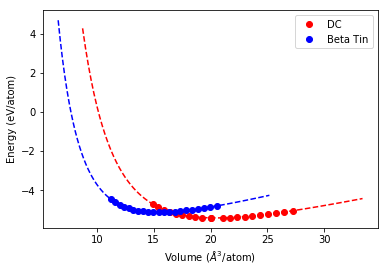

In [12]:
DC_volumes = V_DC
DC_energies = outcar_DC
BSn_volumes = V_BSn
BSn_energies = outcar_BSn

DC = Murnaghan(DC_volumes, DC_energies, name="DC")
DC.fit()
DC.plot_energy()
BSn = Murnaghan(BSn_volumes, BSn_energies, name="Beta Tin")
BSn.fit()
BSn.plot_energy(color='b')
plt.legend()
plt.show()

We can also plot two EOS curves on the same axis, which might be helpful for finding the Equilibrium Pressure. 

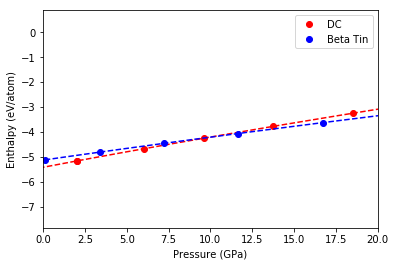

In [13]:
DC.plot_enthalpy()
BSn.plot_enthalpy(color='b')
plt.legend()


In [14]:
import numpy as np
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx
plist = np.linspace(5/160.2,10/160.2,1000)
listDC = [DC.H1(P) for P in plist]
listBSn = [BSn.H1(P) for P in plist]
deltaH = []
for a,b in zip(listDC,listBSn):
    deltaH.append(a-b)
deltaP = find_nearest(np.array(deltaH),0)
P_pt=5+(10-5)/1000*deltaP
P_pt

9.855

In [18]:
print(DC.b0_GPa)
print(BSn.b0_GPa)

84.71530171920115 GPa
101.44538873874765 GPa


<module 'matplotlib.pyplot' from 'C:\\Users\\CNODC-ZY\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

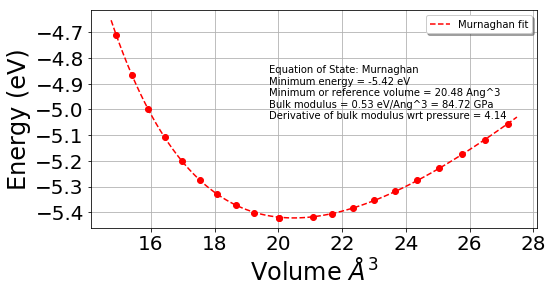

In [19]:
DC.plot()

<module 'matplotlib.pyplot' from 'C:\\Users\\CNODC-ZY\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

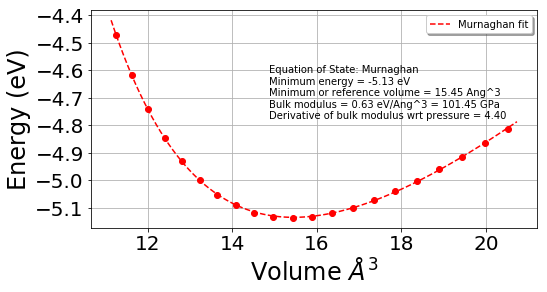

In [20]:
BSn.plot()